In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.basemap import Basemap
import sklearn

from sklearn import neighbors
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
#from statsmodels.tools.eval_measures import mse, rmse




import seaborn as sns
import warnings


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

warnings.filterwarnings('ignore')



In [196]:
Deep_Solar_df = pd.read_csv('deepsolar_tract.csv', encoding='latin1')


In [197]:
Deep_Solar_df.head()

,Unnamed: 0,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,education_high_school_graduate,education_less_than_high_school,education_master,education_population,education_professional_school,employed,gini_index,heating_fuel_coal_coke,heating_fuel_electricity,heating_fuel_fuel_oil_kerosene,heating_fuel_gas,heating_fuel_housing_unit_count,heating_fuel_none,heating_fuel_other,heating_fuel_solar,land_area,per_capita_income,population,population_density,poverty_family_below_poverty_level,poverty_family_count,race_asian,race_black_africa,race_indian_alaska,race_islander,race_other,race_two_more,race_white,state,total_area,unemployed,water_area,education_less_than_high_school_rate,education_high_school_graduate_rate,education_college_rate,education_bachelor_rate,education_master_rate,education_professional_school_rate,education_doctoral_rate,race_white_rate,race_black_africa_rate,race_indian_alaska_rate,race_asian_rate,race_islander_rate,race_other_rate,race_two_more_rate,employ_rate,poverty_family_below_poverty_level_rate,heating_fuel_gas_rate,heating_fuel_electricity_rate,heating_fuel_fuel_oil_kerosene_rate,heating_fuel_coal_coke_rate,heating_fuel_solar_rate,heating_fuel_other_rate,heating_fuel_none_rate,solar_panel_area_divided_by_area,solar_panel_area_per_capita,tile_count_residential,tile_count_nonresidential,solar_system_count_residential,solar_system_count_nonresidential,total_panel_area_residential,total_panel_area_nonresidential,median_household_income,electricity_price_residential,electricity_price_commercial,electricity_price_industrial,electricity_price_transportation,electricity_price_overall,electricity_consume_residential,electricity_consume_commercial,electricity_consume_industrial,electricity_consume_total,household_count,average_household_size,housing_unit_count,housing_unit_occupied_count,housing_unit_median_value,housing_unit_median_gross_rent,lat,lon,elevation,heating_design_temperature,cooling_design_temperature,earth_temperature_amplitude,frost_days,air_temperature,relative_humidity,daily_solar_radiation,atmospheric_pressure,wind_speed,earth_temperature,heating_degree_days,cooling_degree_days,age_18_24_rate,age_25_34_rate,age_more_than_85_rate,age_75_84_rate,age_35_44_rate,age_45_54_rate,age_65_74_rate,age_55_64_rate,age_10_14_rate,age_15_17_rate,age_5_9_rate,household_type_family_rate,dropout_16_19_inschool_rate,occupation_construction_rate,occupation_public_rate,occupation_information_rate,occupation_finance_rate,occupation_education_rate,occupation_administrative_rate,occupation_manufacturing_rate,occupation_wholesale_rate,occupation_retail_rate,occupation_transportation_rate,occupation_arts_rate,occupation_agriculture_rate,occupancy_vacant_rate,occupancy_owner_rate,mortgage_with_rate,transportation_home_rate,transportation_car_alone_rate,transportation_walk_rate,transportation_carpool_rate,transportation_motorcycle_rate,transportation_bicycle_rate,transportation_public_rate,travel_time_less_than_10_rate,travel_time_10_19_rate,travel_time_20_29_rate,travel_time_30_39_rate,travel_time_40_59_rate,travel_time_60_89_rate,health_insurance_public_rate,health_insurance_none_rate,age_median,travel_time_average,voting_2016_dem_percentage,voting_2016_gop_percentage,voting_2016_dem_win,voting_2012_dem_percentage,voting_2012_gop_percentage,voting_2012_dem_win,number_of_years_of_education,diversity,number_of_solar_system_per_household,incentive_count_residential,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
0,0,0.0,0.0,0.000000,27145011200,70352.789869,Stearns County,569,1690,13,1757,336,157,4548,26,3569,0.3490,200,448,98,1720,2527,10,51,0,147.73120,26999.0,6577,44.52005,85,1911,28,19,16,0,6,88,6420,mn,154.37190,136,6.640769,0.073879,0.386324,0.371592,0.125110,0.034521,0.005717,

In [198]:
cooling_degree_days
heating_degree_days
earth_temperature
wind_speed
atmospheric_pressure
daily_solar_radiation
relative_humidity
air_temperature
frost_days
earth_temperature_amplitude
cooling_design_temperature
heating_design_temperature
elevation
lat	
lon

NameError: name 'cooling_degree_days' is not defined

In [ ]:
solar_regression_set= Deep_Solar_df[['cooling_degree_days','heating_degree_days',
                                     'earth_temperature','wind_speed',
                                     'atmospheric_pressure','daily_solar_radiation',
                                     'relative_humidity','air_temperature',
                                     'frost_days','earth_temperature_amplitude',
                                     'cooling_design_temperature','heating_design_temperature',
                                     'elevation','lat','lon']].dropna(subset=['cooling_degree_days','heating_degree_days',
                                     'earth_temperature','wind_speed',
                                     'atmospheric_pressure','daily_solar_radiation',
                                     'relative_humidity','air_temperature',
                                     'frost_days','earth_temperature_amplitude',
                                     'cooling_design_temperature','heating_design_temperature',
                                     'elevation','lat','lon'])
solar_regression_set.describe()


In [ ]:
solar_regression_set.info()

In [199]:
from sklearn.preprocessing import StandardScaler
scaled_solar_regression_set= StandardScaler().fit_transform(solar_regression_set)

scaled_solar_reg_set=pd.DataFrame(scaled_solar_regression_set)
scaled_solar_reg_set.columns = ['cooling_degree_days','heating_degree_days',
                                     'earth_temperature','wind_speed',
                                     'atmospheric_pressure','daily_solar_radiation',
                                     'relative_humidity','air_temperature',
                                     'frost_days','earth_temperature_amplitude',
                                     'cooling_design_temperature','heating_design_temperature',
                                     'elevation',
                                     'lat','lon'
                               ]





pd.DataFrame(scaled_solar_reg_set).describe()

,cooling_degree_days,heating_degree_days,earth_temperature,wind_speed,atmospheric_pressure,daily_solar_radiation,relative_humidity,air_temperature,frost_days,earth_temperature_amplitude,cooling_design_temperature,heating_design_temperature,elevation,lat,lon
count,6.673500e+04,6.673500e+04,6.673500e+04,6.673500e+04,6.673500e+04,6.673500e+04,6.673500e+04,6.673500e+04,6.673500e+04,6.673500e+04,6.673500e+04,6.673500e+04,6.673500e+04,6.673500e+04,6.673500e+04
mean,-1.089655e-14,1.626715e-15,-1.957025e-14,-1.292605e-14,-8.727774e-15,1.711480e-14,-1.842050e-15,-4.093791e-15,-6.540943e-15,1.499170e-15,1.335960e-15,2.009490e-14,-6.000394e-15,-5.356121e-16,3.995222e-16
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-1.986098e+00,-1.924385e+00,-2.574396e+00,-2.184230e+00,-5.214599e+00,-1.721579e+00,-3.356580e+00,-2.584646e+00,-1.327735e+00,-3.790677e+00,-4.046613e+00,-2.766749e+00,-8.232401e-01,-2.646455e+00,-2.139599e+00
25%,-7.184251e-01,-8.692718e-01,-7.834393e-01,-8.657362e-01,-7.368376e-02,-8.376661e-01,-3.575008e-02,-8.165246e-01,-9.858934e-01,-4.652057e-01,-6.553781e-01,-7.041102e-01,-5.273260e-01,-7.510267e-01,-4.446116e-01
50%,-2.109345e-01,1.475474e-01,-2.135895e-01,1.231340e-01,2.530694e-01,-2.604172e-01,3.048478e-01,-1.227048e-01,-5.857582e-04,2.054003e-01,2.446847e-02,-1.706430e-01,-2.600488e-01,2.118697e-01,2.961206e-01
75%,5.587243e-01,7.716528e-01,8.039994e-01,7.823807e-01,5.362554e-01,6.415342e-01,5.177215e-01,8.173090e-01,7.836387e-01,6.716093e-01,6.843196e-01,6.598683e-01,4.779723e-02,7.477426e-01,7.308912e-01
max,3.247792e+00,2.872916e+00,2.574604e+00,4.078614e+00,8.847920e-01,2.571710e+00,1.688527e+00,2.540668e+00,2.834687e+00,2.265447e+00,3.099775e+00,3.163527e+00,5.560390e+00,2.283938e+00,1.564963e+00


In [200]:
X = scaled_solar_reg_set[['cooling_degree_days','heating_degree_days',
                                     'wind_speed',
                                     'atmospheric_pressure','daily_solar_radiation',
                                     'relative_humidity','air_temperature',
                                     'frost_days','earth_temperature_amplitude',
                                     'cooling_design_temperature','heating_design_temperature',
                                     'elevation',
                                     #'lat','lon'
                                     ]]
Y = scaled_solar_reg_set['earth_temperature']


In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [202]:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53388 entries, 13924 to 15795
Data columns (total 12 columns):
cooling_degree_days            53388 non-null float64
heating_degree_days            53388 non-null float64
wind_speed                     53388 non-null float64
atmospheric_pressure           53388 non-null float64
daily_solar_radiation          53388 non-null float64
relative_humidity              53388 non-null float64
air_temperature                53388 non-null float64
frost_days                     53388 non-null float64
earth_temperature_amplitude    53388 non-null float64
cooling_design_temperature     53388 non-null float64
heating_design_temperature     53388 non-null float64
elevation                      53388 non-null float64
dtypes: float64(12)
memory usage: 5.3 MB


#KNN REgession 

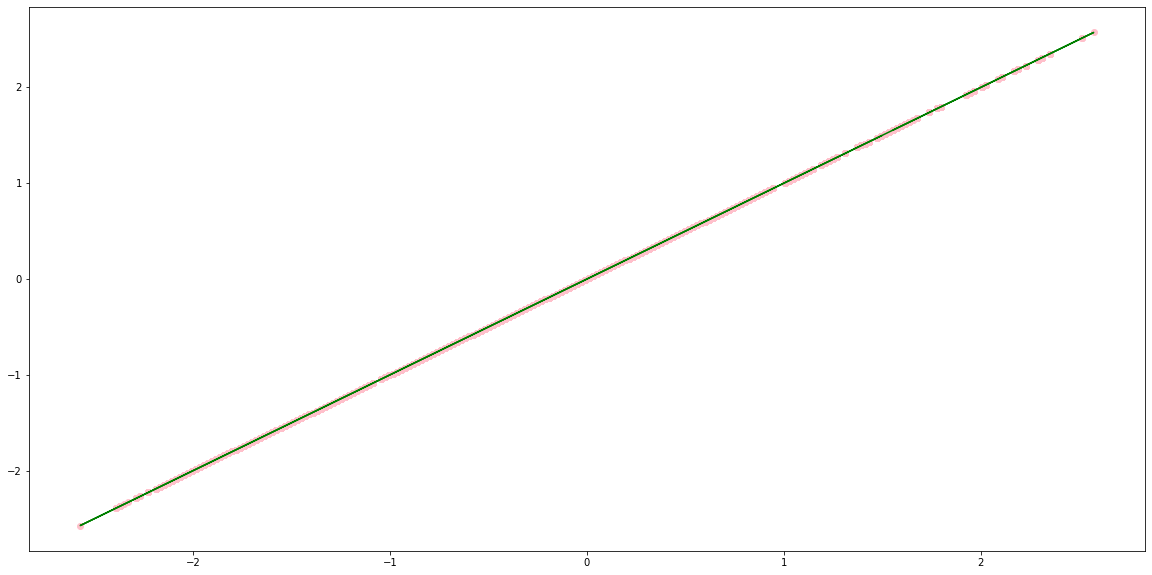

In [208]:

knn = neighbors.KNeighborsRegressor(n_neighbors=10,weights='distance')

knn.fit(X_train,Y_train)



trainingresults = knn.predict(X_train)


plt.figure(figsize=(20,10))

plt.scatter(Y_train, trainingresults, c='pink', label='data')
plt.plot(Y_train, Y_train, c='g', label='prediction')

plt.show()


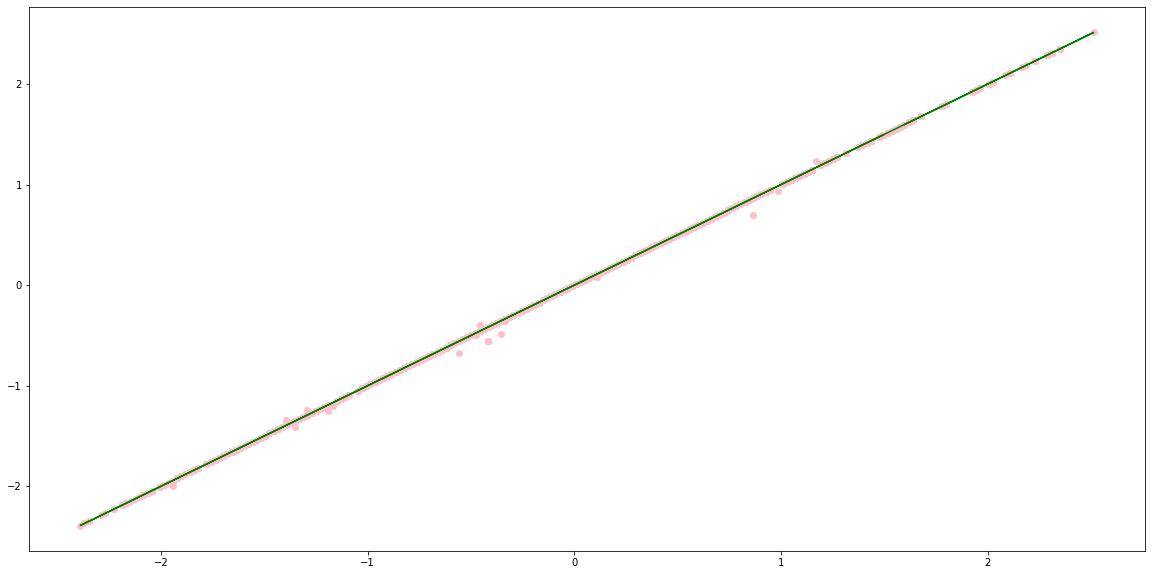


R-squared of the model in the training set is: 0.9968243799279367
-----Test set statistics-----
R-squared of the model in the test set is: 0.9967451506391435
Mean absolute error of the prediction is: 0.00013514592815147238
Mean squared error of the prediction is: 1.463951284560151e-05
Root mean squared error of the prediction is: 0.003826161633491391
Mean absolute percentage error of the prediction is: 0.02863997668968652


In [209]:
# Set up our prediction line.
#T = np.arange(3, 800, 1)[:, np.newaxis]
#T=(100,200)
# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(X_test)


plt.figure(figsize=(20,10))

plt.scatter(Y_test, Y_, c='pink', label='data')
plt.plot(Y_test, Y_test, c='g', label='prediction')
#plt.xscale('log')
#plt.yscale('log')

#plt.legend()
#plt.title('K=10, Unweighted')
plt.show()
print()
#print(Y,T)
print("R-squared of the model in the training set is: {}".format(OLS.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(OLS.score(X_test, Y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, Y_)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, Y_)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, Y_)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - Y_) / Y_test)) * 100))

# OLS regression 


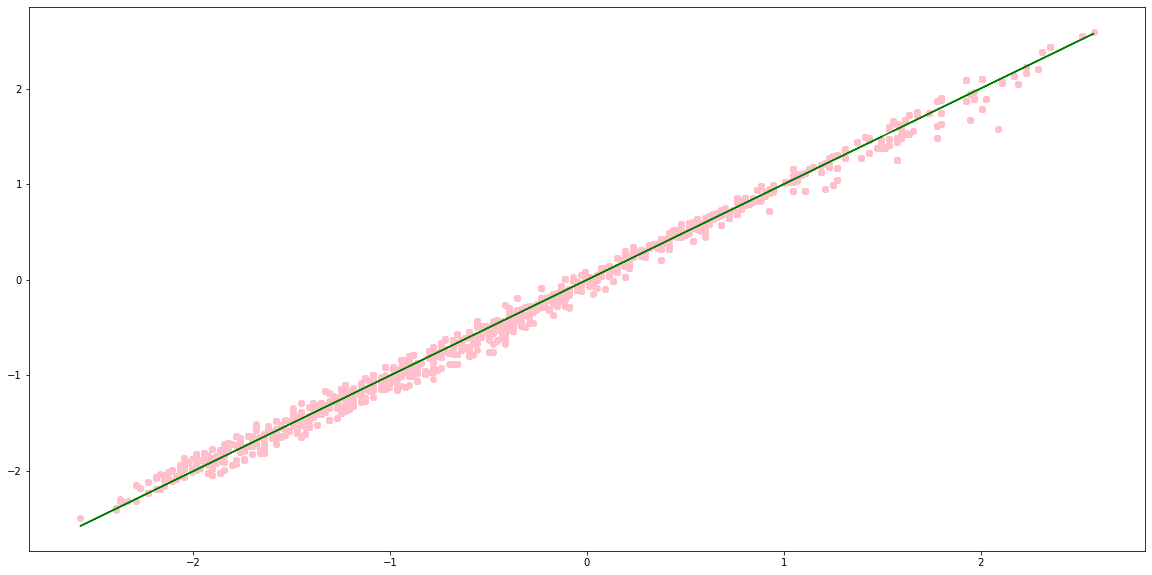

In [210]:

OLS=LinearRegression()

OLS.fit(X_train, Y_train)


trainingresults = OLS.predict(X_train)


plt.figure(figsize=(20,10))

plt.scatter(Y_train, trainingresults, c='pink', label='data')
plt.plot(Y_train, Y_train, c='g', label='prediction')

plt.show()



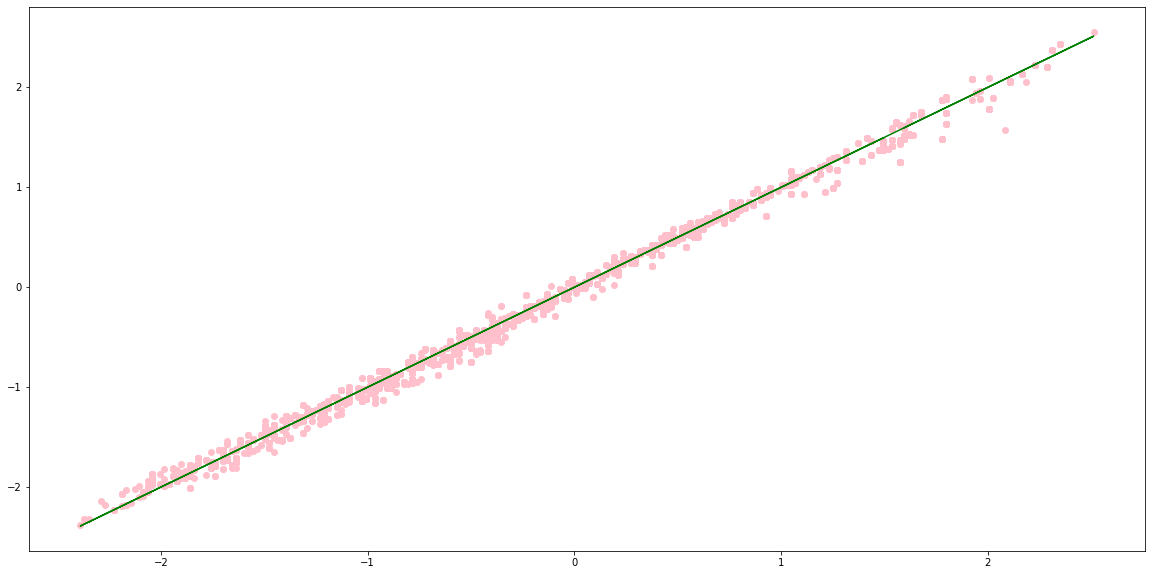

R-squared of the model in the training set is: 0.9968243799279367
-----Test set statistics-----
R-squared of the model in the test set is: 0.9967451506391435
Mean absolute error of the prediction is: 0.040546438850965226
Mean squared error of the prediction is: 0.00323921430556051
Root mean squared error of the prediction is: 0.05691409584242299
Mean absolute percentage error of the prediction is: 12.524853793376803


In [211]:
Y_ = OLS.predict(X_test)


plt.figure(figsize=(20,10))

plt.scatter(Y_test, Y_, c='pink', label='data')
plt.plot(Y_test, Y_test, c='g', label='prediction')

plt.show()
print("R-squared of the model in the training set is: {}".format(OLS.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(OLS.score(X_test, Y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, Y_)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, Y_)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, Y_)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - Y_) / Y_test)) * 100))

# Results
as can bee seen in the residual plots above the KNN apears to be superior in its predictive ability with a high R square value for both train and test sets and an error much lower than that of the OLS regession. 